<a href="https://colab.research.google.com/github/DestiniWright/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Copy_of_High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
import matplotlib.pyplot as plt
import numpy as np

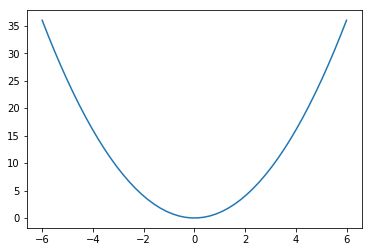

In [11]:
#passes the VLT
x = np.linspace(-6, 6)
y = x**2

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, y)

plt.show()

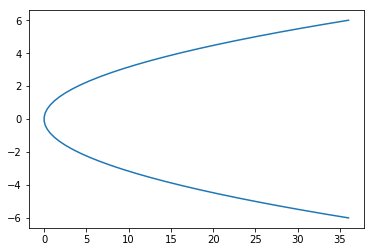

In [12]:
#doesn't pass VLT
y = np.linspace(-6, 6)
x = y**2

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, y)

plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

There's more than one possible output for a single input. Therefore we can't gain any valuable information. For instance, in the above, an input of 16 could result in an output of -4 or 4, but we don't know which.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relation 2 is the only function because its the only one where x values aren't mapped to more than one y value

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

Domain Dimension: 
    
    m: 3
    n: 2
    
Codomain Dimension:

    m: 1
    n: 1

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

\\
\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = x_1\begin{bmatrix} 1 \\ 0 \end{bmatrix} + x_2\begin{bmatrix}0 \\ 1 \end{bmatrix}
\\
p(\begin{bmatrix}1 \\ 0 \end{bmatrix}) =                            \begin{bmatrix} 1 \\ 3 \end{bmatrix}
\\
p(\begin{bmatrix}0 \\ 1 \end{bmatrix}) = \begin{bmatrix} -1 \\ 2 \end{bmatrix}
\\
T = \begin{bmatrix}1&3\\-1&2\end{bmatrix}
\\
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = x_1\begin{bmatrix} 1 \\0 \\ 0  \end{bmatrix} + x_2\begin{bmatrix}0\\1\\0\end{bmatrix} + x_3\begin{bmatrix}0\\0\\1\end{bmatrix}
\\
q(\begin{bmatrix}1 \\ 0\\0 \end{bmatrix}) = \begin{bmatrix} 4 \\ 1\\2 \end{bmatrix}
\\
q(\begin{bmatrix}0 \\ 1 \\0\end{bmatrix}) = \begin{bmatrix} -1 \\ 2 \\3\end{bmatrix}
\\
q(\begin{bmatrix}0 \\ 0 \\1\end{bmatrix}) = \begin{bmatrix} 5 \\ 1 \\-2\end{bmatrix}
\\
T = \begin{bmatrix}4&1&2\\-1&2&3\\5&1&-2\end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

\begin{align}
p(\begin{bmatrix}1 \\ 2 \end{bmatrix}) = \begin{bmatrix} 7 \\4 \\  \end{bmatrix}
\\
\begin{bmatrix}1&3\\-1&2\end{bmatrix}\begin{bmatrix}1\\2\end{bmatrix} = \begin{bmatrix}7\\4\end{bmatrix}
\\
\end{align}

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvectors are vetors that do not change diretion during the course of a transformation and the eigenvalues are the scale to which they're stretched.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

Its harder to process, harder to graph, harder to gain valuable insight, and tend to overfit if not given enough datapoints, generally requiring 5 times as many as dimensions.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

5 times as many

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [0]:
import pandas as pd

In [0]:
irisDF = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')

In [17]:
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
#Y = sepal_length
#X = sepal_width, petal_length, petal_width

irisMeans = irisDF.mean(axis = 0)
irisStDev = irisDF.std(axis = 0)

sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
dtype: float64

In [0]:
sWidth = irisDF['sepal_width']
pLength = irisDF['petal_length']
pWidth = irisDF['petal_width']

In [0]:
Zsw = (sWidth - irisMeans[1])/irisStDev[1]
Zpl = (pLength - irisMeans[2])/irisStDev[2]
Zpw = (pWidth - irisMeans[3])/irisStDev[3]

In [0]:
Z = pd.DataFrame([Zsw, Zpl, Zpw])

In [35]:
covMat = np.cov(Z)

covMat

array([[ 0.04531127, -0.07906812, -0.03028933],
       [-0.07906812,  0.78024547,  0.3393952 ],
       [-0.03028933,  0.3393952 ,  0.15927465]])

In [39]:
values, vectors = np.linalg.eig(covMat)
print(values, vectors)

[0.93776349 0.03790561 0.0091623 ] [[ 0.09433979 -0.98494609 -0.14484893]
 [-0.91123452 -0.02683488 -0.41101281]
 [-0.40093846 -0.17076621  0.90004848]]


In [42]:
vectors.T.dot(Z)

array([[ 1.30604106e+00,  1.28288394e+00,  1.33776558e+00,
         1.24189658e+00,  1.31067248e+00,  1.14577652e+00,
         1.28044270e+00,  1.25579085e+00,  1.27825252e+00,
         1.26286352e+00,  1.26968512e+00,  1.21017207e+00,
         1.30385088e+00,  1.44070724e+00,  1.42043575e+00,
         1.26017121e+00,  1.32825166e+00,  1.28507412e+00,
         1.16211204e+00,  1.25334961e+00,  1.16455328e+00,
         1.22775124e+00,  1.49314763e+00,  1.09702104e+00,
         1.07331571e+00,  1.19164637e+00,  1.16823819e+00,
         1.26042228e+00,  1.30140964e+00,  1.20090922e+00,
         1.19627780e+00,  1.21385697e+00,  1.30917775e+00,
         1.33846102e+00,  1.26286352e+00,  1.38338436e+00,
         1.35165985e+00,  1.26286352e+00,  1.32850273e+00,
         1.25579085e+00,  1.33069291e+00,  1.27511583e+00,
         1.33776558e+00,  1.13093573e+00,  1.04990753e+00,
         1.26191701e+00,  1.22869776e+00,  1.29214679e+00,
         1.26968512e+00,  1.29677821e+00, -4.64876392e-0

In [44]:
from numpy import array
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(irisDF['sepal_width', 'petal_length', 'petal_width'])

print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)

KeyError: ignored

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)